In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set_style('ticks')
import xlrd
import datetime

In [3]:
import curveball

In [4]:
filename = r"D:\Google Drive\ex silico\tecan\Yoav_180515_0916.xlsx"

,Row,Col,Color,Strain
0,A,1,#4daf4a,DH5a
1,A,2,#4daf4a,DH5a
2,A,3,#4daf4a,DH5a
3,A,4,#4daf4a,DH5a
4,A,5,#377eb8,Competition


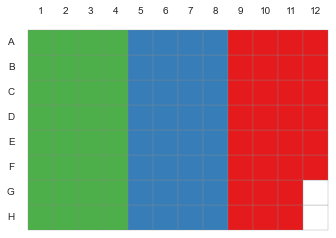

In [5]:
plate = pd.read_csv('../plate_templates/DH5a-TG1.csv')
curveball.plots.plot_plate(plate)
plate.head()

In [6]:
datadir = os.path.join('D:\\', 'Google Drive', 'ex silico', 'tecan')
file_pattern = 'Yoav_1?0515_????.xlsx'

In [7]:
filename = os.path.join(datadir, file_pattern)
print filename
df = curveball.ioutils.read_sunrise_xlsx(filename, plate=plate)
print df.shape
df.head()

D:\Google Drive\ex silico\tecan\Yoav_1?0515_????.xlsx
(864, 8)


,Row,Col,OD,Time,Well,Filename,Color,Strain
0,A,1,0.133,0.000000,A1,Yoav_180515_0916.xlsx,#4daf4a,DH5a
1,A,1,0.153,1.048056,A1,Yoav_180515_1019.xlsx,#4daf4a,DH5a
2,A,1,0.221,2.008611,A1,Yoav_180515_1117.xlsx,#4daf4a,DH5a
3,A,1,0.293,3.027500,A1,Yoav_180515_1218.xlsx,#4daf4a,DH5a
4,A,1,0.338,4.047222,A1,Yoav_180515_1319.xlsx,#4daf4a,DH5a


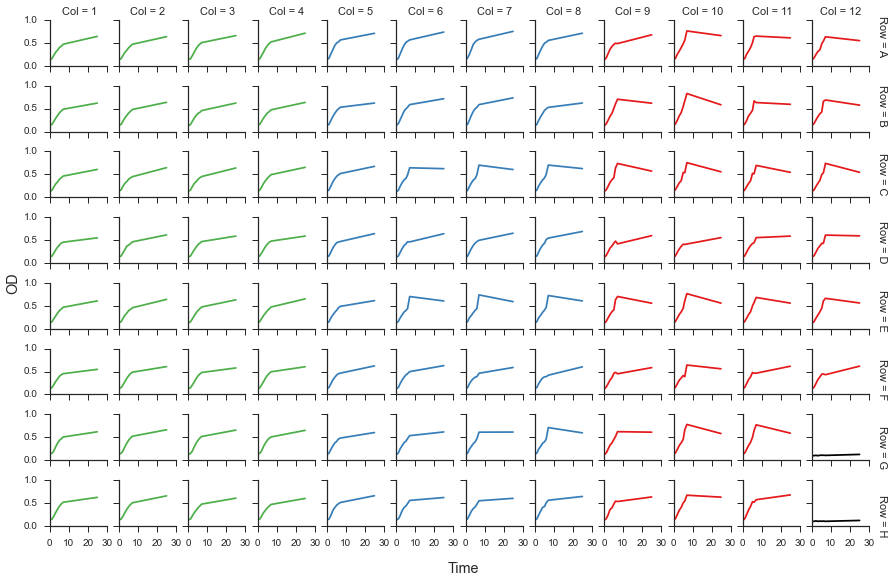

In [8]:
curveball.plots.plot_wells(df)

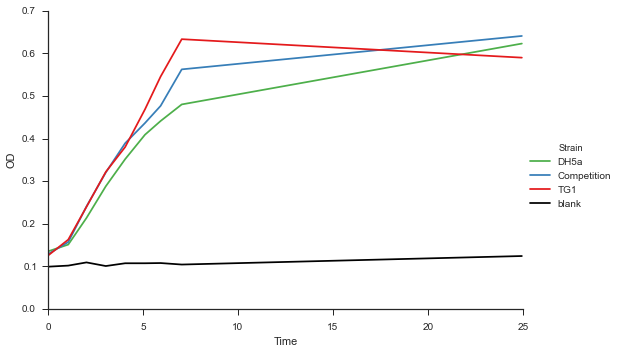

In [9]:
curveball.plots.plot_strains(df, by=('Strain', 'Time'))

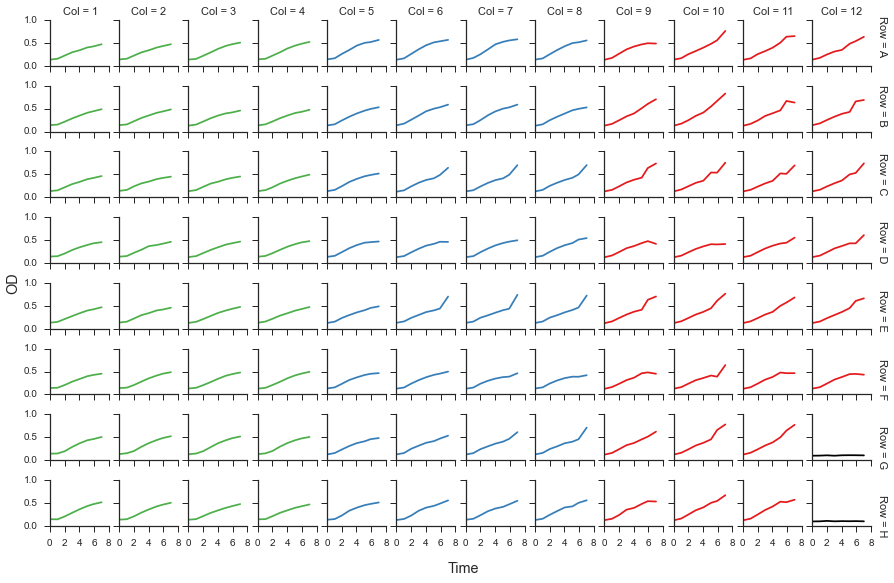

In [8]:
df = df[df.Time<=8]
curveball.plots.plot_wells(df)

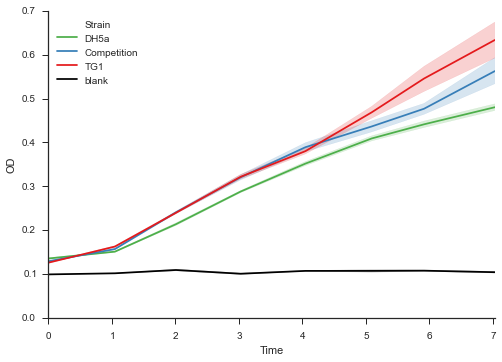

In [10]:
curveball.plots.tsplot(df)

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 8
    # variables        = 5
    chi-square         = 2.441
    reduced chi-square = 0.814
[[Variables]]
    y0:   0.12566580 +/- 0.003126 (2.49%) (init= 0.1257)
    r:    0.55993284 +/- 0.153952 (27.49%) (init= 0.3427643)
    K:    0.59168339 +/- 0.125538 (21.22%) (init= 0.6335667)
    nu:   1 (fixed)
    q0:   0.02997799 +/- 2.331536 (7777.49%) (init= 1)
    v:    8.13612684 +/- 126.6241 (1556.32%) (init= 1)



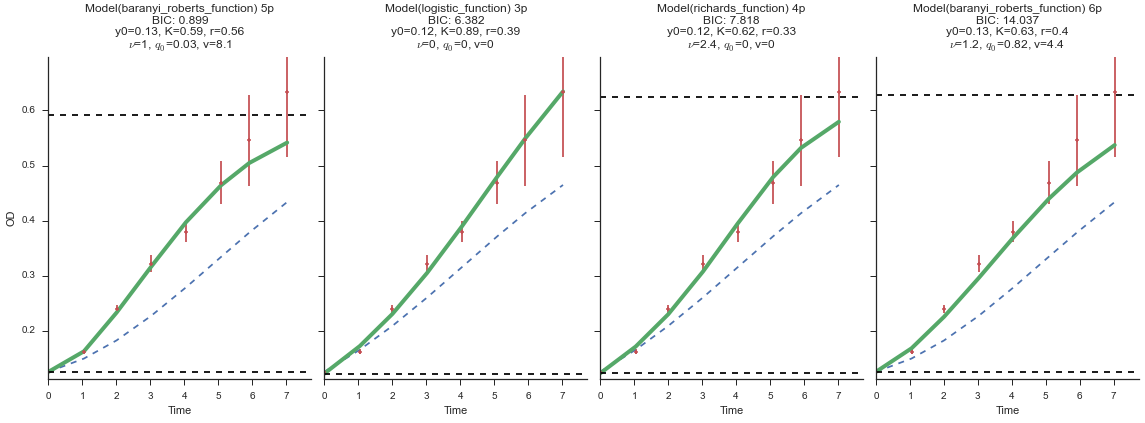

In [11]:
TG1_model = curveball.models.fit_model(df[df.Strain=='TG1'])[0][0]

[[Model]]
    Model(baranyi_roberts_function)
[[Fit Statistics]]
    # function evals   = 54
    # data points      = 8
    # variables        = 6
    chi-square         = 1.448
    reduced chi-square = 0.724
[[Variables]]
    y0:   0.13430723 +/- 0.004481 (3.34%) (init= 0.13525)
    r:    0.46649298 +/- 0.466935 (100.09%) (init= 0.3106817)
    K:    0.49856311 +/- 0.055489 (11.13%) (init= 0.48025)
    nu:   1.42434800 +/- 2.868754 (201.41%) (init= 1)
    q0:   0.02037818 +/- 0.240827 (1181.79%) (init= 1)
    v:    4.71399440 +/- 6.996675 (148.42%) (init= 1)



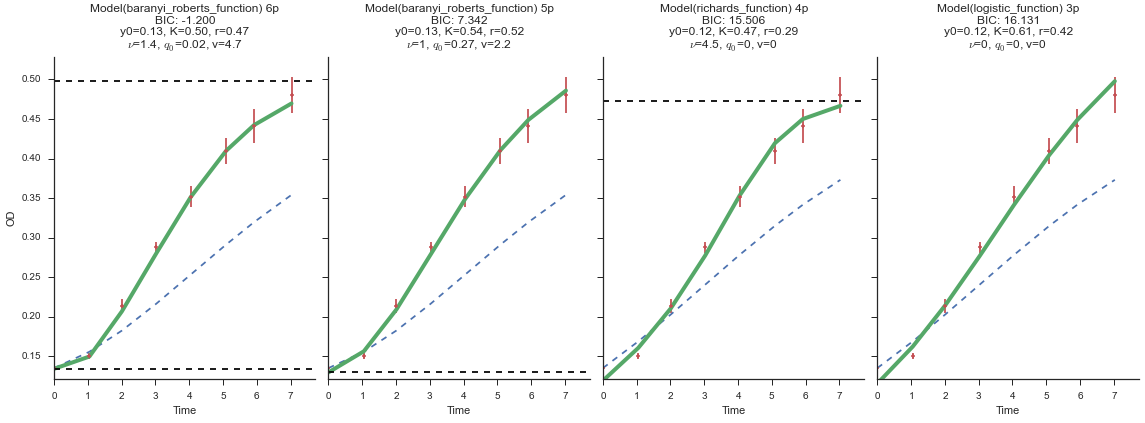

In [12]:
DH5a_model = curveball.models.fit_model(df[df.Strain=='DH5a'])[0][0]

In [43]:
curveball.models.find_all_outliers(df[df.Strain=='TG1'], TG1_model, max_outlier_fraction=0.5)

[[u'A9', u'H11'], [u'D10']]

In [44]:
curveball.models.find_all_outliers(df[df.Strain=='DH5a'], DH5a_model, max_outlier_fraction=0.5)

[[u'D2']]

In [17]:
TG1_color = df[df.Strain=='TG1'].Color.unique()[0]
DH5a_color = df[df.Strain=='DH5a'].Color.unique()[0]

D:\workspace\curveball_project\python\venv\lib\site-packages\numpy\lib\nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


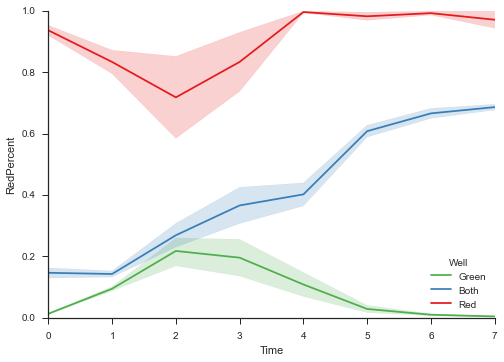

In [18]:
flow = pd.read_csv('D:/Google Drive/ex silico/flow/competition/2015-05-19/flow_analysis.csv')
red,blue,green = sns.color_palette('Set1', 3)
sns.tsplot(flow, 'Time', 'Col', 'Well', 'RedPercent', color={'Red':red,'Green':green,'Both':blue}, estimator=np.nanmean)
sns.despine()

In [19]:
flow_agg = flow[flow.Well=='Both'].groupby('Time').RedPercent.agg([np.mean, np.std]).reset_index()
flow_agg.head()

,Time,mean,std
0,0,0.146655,0.039396
1,1,0.142735,0.022491
2,2,0.268976,0.092110
3,3,0.366130,0.123645
4,4,0.402161,0.074923


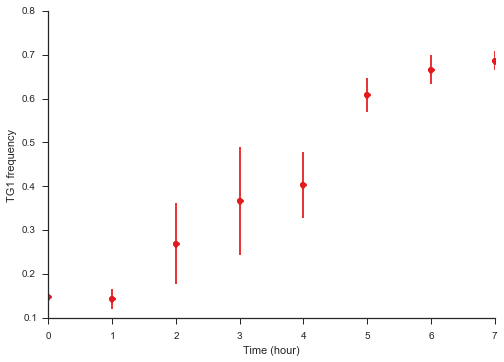

In [41]:
plt.errorbar(flow_agg.Time, flow_agg['mean'], flow_agg['std'], fmt='o', color=TG1_color)
plt.xlabel('Time (hour)')
plt.ylabel('TG1 frequency')
sns.despine()

In [21]:
p0 = flow_agg['mean'][0]
print 'p0', p0
min_OD = df[df.Strain=='Competition'].OD.min()
y0 = min_OD*p0, min_OD*(1-p0)
print 'y0', y0

p0 0.146655141314
y0 (0.017745272098952797, 0.10325472790104721)


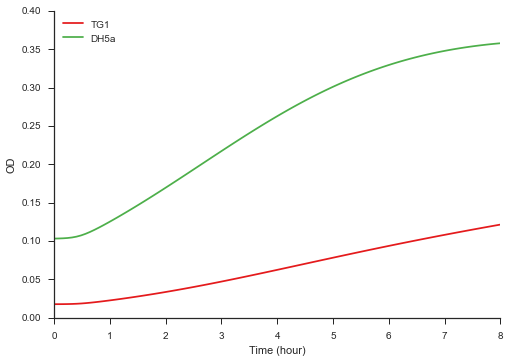

In [22]:
t,y,fig,ax = curveball.competitions.compete(TG1_model, DH5a_model, y0=y0, hours=8, PLOT=True)
ax.get_lines()[0].set_color(TG1_color)
ax.get_lines()[1].set_color(DH5a_color)
ax.legend(['TG1', 'DH5a'], loc='upper left');

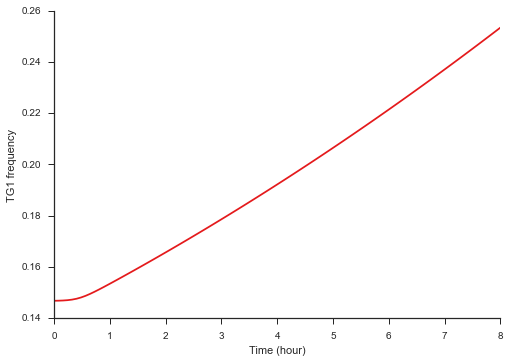

In [23]:
p = y[:,0] / y.sum(axis=1)
plt.plot(t, p, color=TG1_color)
plt.xlabel('Time (hour)')
plt.ylabel('TG1 frequency')
sns.despine()

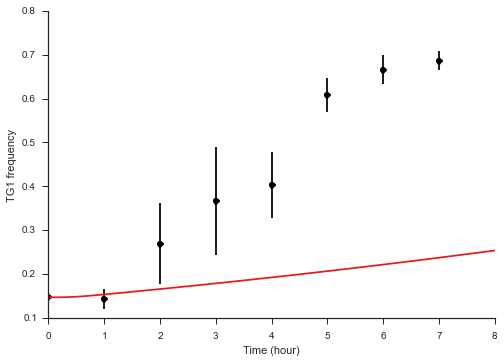

In [24]:
plt.errorbar(flow_agg.Time, flow_agg['mean'], flow_agg['std'], fmt='ok')
plt.plot(t, p, color=TG1_color)
plt.xlabel('Time (hour)')
plt.ylabel('TG1 frequency')
sns.despine()

In [29]:
df_compete = df[df.Strain=='Competition'].groupby(['Time']).OD.agg([np.mean, np.std]).reset_index()
df_compete.head()

,Time,mean,std
0,0.000000,0.128937,0.004016
1,1.048056,0.156781,0.004924
2,2.008611,0.240500,0.007960
3,3.027500,0.320437,0.017978
4,4.047222,0.389094,0.030308


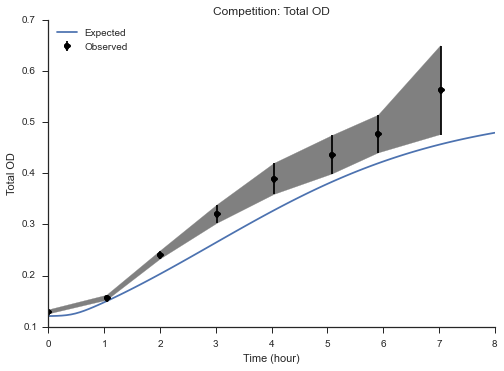

In [39]:
plt.plot(t, y.sum(axis=1), label='Expected')
plt.errorbar(df_compete.Time, df_compete['mean'], df_compete['std'], fmt='ok', label='Observed')
plt.fill_between(df_compete.Time, df_compete['mean'] + df_compete['std'], df_compete['mean'] - df_compete['std'], color='gray')
plt.xlabel('Time (hour)')
plt.ylabel('Total OD')
plt.legend(loc='upper left')
plt.title('Competition: Total OD')
sns.despine()